In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_customers = pd.read_csv(r"C:\Users\DELL\Documents\Datasets\Banking Domain Data Analysis\C8_Input Files\dim_customers.csv")
df_spend = pd.read_csv(r"C:\Users\DELL\Documents\Datasets\Banking Domain Data Analysis\C8_Input Files\fact_spends.csv")
df_customers
df_spend

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102
...,...,...,...,...,...
863995,ATQCUS1993,June,Bills,Debit Card,897
863996,ATQCUS1063,September,Bills,Credit Card,2680
863997,ATQCUS0416,August,Others,Credit Card,270
863998,ATQCUS3361,September,Bills,UPI,446


Checking if there's any null value present in the dataset

In [5]:
df_customers.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

Merging two sheets

In [5]:
df = pd.merge(df_spend, df_customers, on='customer_id', how='inner')
df

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696
1,ATQCUS1371,May,Bills,UPI,787,35-45,Chennai,Salaried IT Employees,Male,Married,64696
2,ATQCUS1371,September,Bills,Net Banking,1022,35-45,Chennai,Salaried IT Employees,Male,Married,64696
3,ATQCUS1371,September,Bills,UPI,1942,35-45,Chennai,Salaried IT Employees,Male,Married,64696
4,ATQCUS1371,August,Electronics,Credit Card,1865,35-45,Chennai,Salaried IT Employees,Male,Married,64696
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS0890,October,Groceries,Net Banking,764,35-45,Mumbai,Salaried IT Employees,Male,Married,65187
863996,ATQCUS0890,September,Health & Wellness,Debit Card,1188,35-45,Mumbai,Salaried IT Employees,Male,Married,65187
863997,ATQCUS0890,September,Electronics,UPI,2786,35-45,Mumbai,Salaried IT Employees,Male,Married,65187
863998,ATQCUS0890,August,Groceries,Debit Card,2593,35-45,Mumbai,Salaried IT Employees,Male,Married,65187


Checking if there is any duplicate row present in the dataset.

In [8]:
df.duplicated().sum()

0

Checking all the Unique Values of each columns.

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")


Unique values in customer_id column: ['ATQCUS1371' 'ATQCUS0368' 'ATQCUS0595' ... 'ATQCUS2357' 'ATQCUS1814'
 'ATQCUS0890']
Unique values in month column: ['July' 'May' 'September' 'August' 'October' 'June']
Unique values in category column: ['Health & Wellness' 'Bills' 'Electronics' 'Travel' 'Others' 'Groceries'
 'Food' 'Entertainment' 'Apparel']
Unique values in payment_type column: ['Credit Card' 'UPI' 'Net Banking' 'Debit Card']
Unique values in spend column: [1114  787 1022 ... 4793 4291 6266]
Unique values in age_group column: ['35-45' '25-34' '45+' '21-24']
Unique values in city column: ['Chennai' 'Delhi NCR' 'Bengaluru' 'Mumbai' 'Hyderabad']
Unique values in occupation column: ['Salaried IT Employees' 'Salaried Other Employees' 'Government Employees'
 'Business Owners' 'Freelancers']
Unique values in gender column: ['Male' 'Female']
Unique values in marital status column: ['Married' 'Single']
Unique values in avg_income column: [64696 39893 52001 ... 58721 65686 65187]


Summary Statistics:

In [10]:
df.describe()

,spend,avg_income
count,864000.000000,864000.000000
mean,614.464994,51657.032250
std,661.571676,14688.312762
min,6.000000,24816.000000
25%,191.000000,38701.000000
50%,395.000000,50422.000000
75%,793.000000,64773.250000
max,10313.000000,86600.000000


Correlation Heatmap

C:\Users\DELL\AppData\Local\Temp\ipykernel_10232\2883407773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


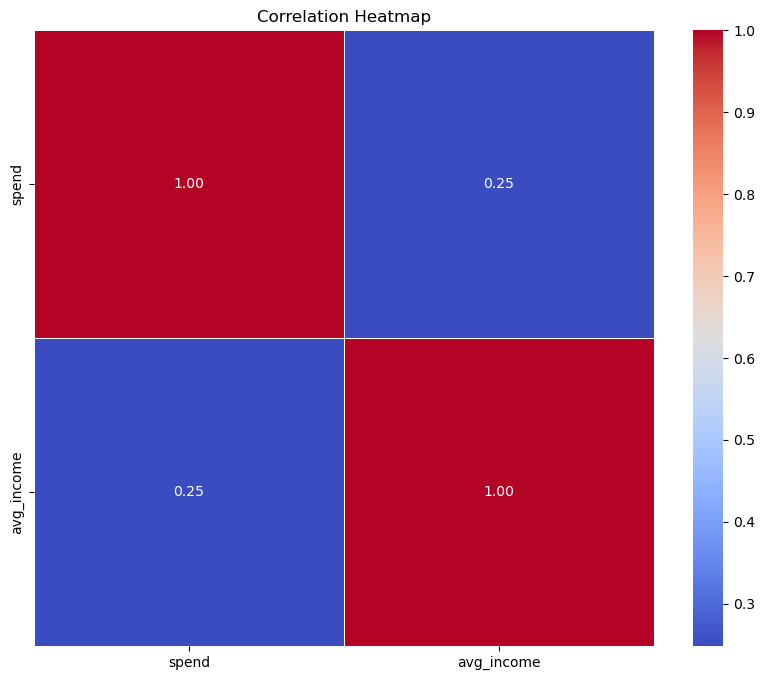

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
df.columns

Index(['customer_id', 'month', 'category', 'payment_type', 'spend',
       'age_group', 'city', 'occupation', 'gender', 'marital status',
       'avg_income'],
      dtype='object')

Customer Analysis:

Gender Distribution:
What is the distribution of genders among the customers?

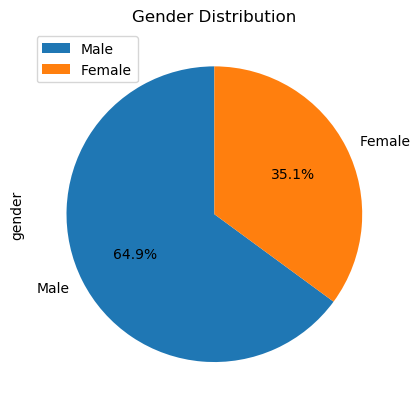

In [28]:
plt.style.use('_classic_test_patch')
gender_dist = df_customers['gender'].value_counts()
gender_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Gender Distribution')
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=gender_dist.index, loc='upper left')
plt.show()

Age Group Distribution:
How are customers distributed across different age groups?

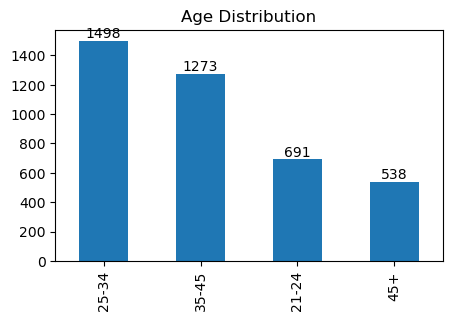

In [33]:
plt.style.use('_classic_test_patch')
age_dist = df_customers['age_group'].value_counts()
plt.subplots(figsize= (5,3))
age_dist.plot(kind='bar', title= 'Age Distribution', width= 0.5)
for i, v in enumerate(age_dist):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Marital Status Distribution:
What is the percentage of married and single customers?

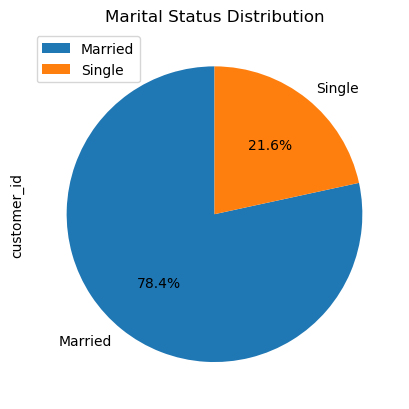

In [30]:
plt.style.use('_classic_test_patch')
ms_dist = df.groupby('marital status')['customer_id'].nunique()

ms_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Marital Status Distribution')
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=ms_dist.index, loc= 2)
plt.show()

City-wise Customer Count:
How many customers are there in each city?

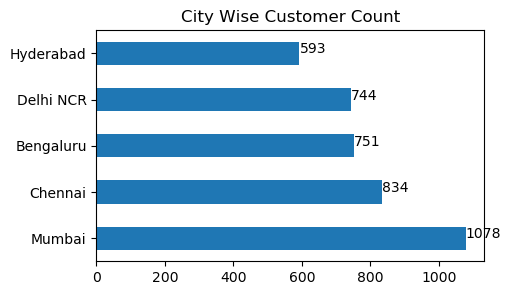

In [41]:
plt.style.use("_classic_test_patch")
ccc = df_customers['city'].value_counts()
plt.subplots(figsize= (5,3))
ccc.plot(kind= 'barh', title= 'City Wise Customer Count', width= 0.5)
for i, v in enumerate(ccc):
    plt.text(v, i, str(v), ha= 'left')
plt.show()


City Wise Spending Analysis

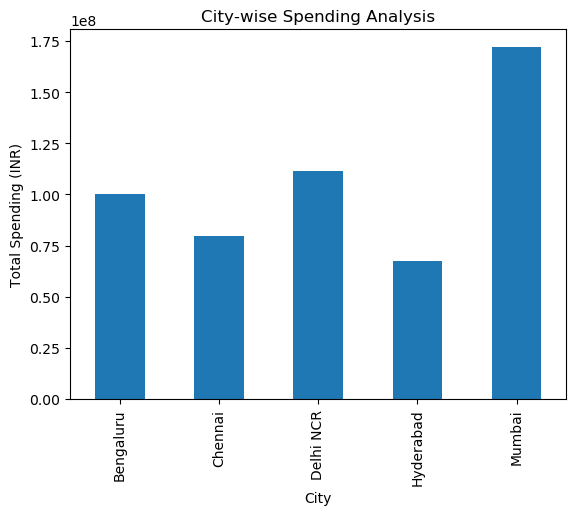

In [49]:
cs = df.groupby('city')['spend'].sum()

cs.plot(kind='bar', title='City-wise Spending Analysis')
plt.xlabel('City')
plt.ylabel('Total Spending (INR)')
plt.show()

Occupation Distribution:
What is the distribution of customers based on their occupations?

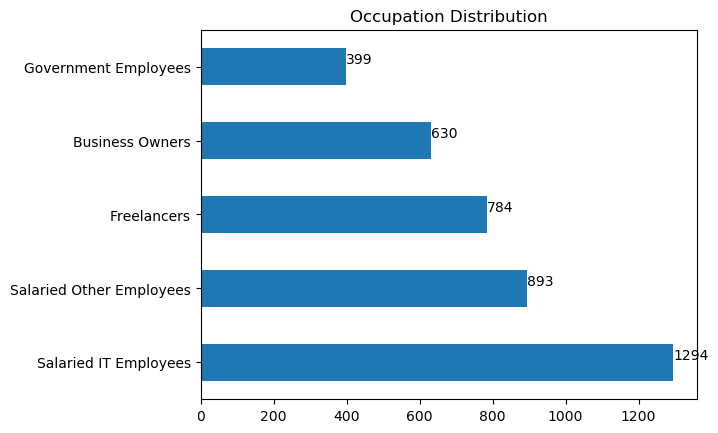

In [42]:
plt.style.use("_classic_test_patch")
od = df_customers['occupation'].value_counts()
od.plot(kind= 'barh', title= 'Occupation Distribution', width= 0.5)
for i, v in enumerate(od):
    plt.text(v, i, str(v), ha= 'left', va='bottom')
plt.show()

Average Income Distribution:
Visualize the distribution of average incomes among customers.

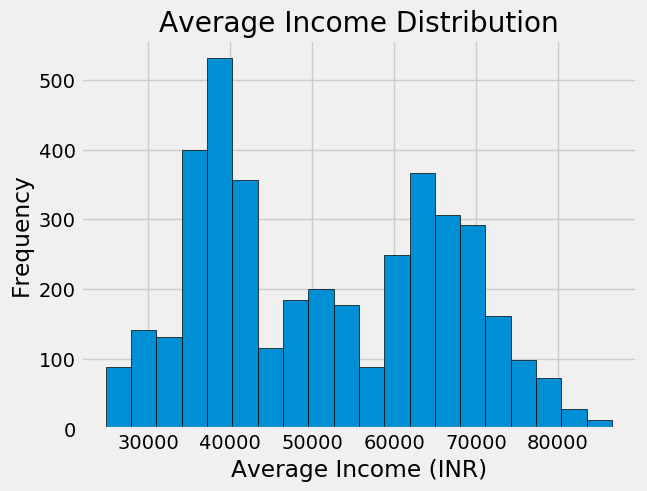

In [118]:
plt.hist(df_customers['avg_income'], bins=20, edgecolor='black')
plt.title('Average Income Distribution')
plt.xlabel('Average Income (INR)')
plt.ylabel('Frequency')
plt.show()

Category-wise Spending Distribution: How is spending distributed across different categories?

In [126]:
cwsd = df_spend.groupby('category')['spend'].sum().sort_values(ascending= False)
cwsd

category
Bills                104912768
Groceries             86303761
Electronics           79562220
Health & Wellness     65599867
Travel                59223324
Food                  44013470
Entertainment         41289162
Apparel               34036001
Others                15957182
Name: spend, dtype: int64

Top Spenders: Who are the top 10 customers with the highest total spending?

In [129]:
ts = df_spend.groupby('customer_id')['spend'].sum().sort_values(ascending = False).head(10)
ts

customer_id
ATQCUS0918    315201
ATQCUS0914    309425
ATQCUS0922    306975
ATQCUS0944    304288
ATQCUS0943    300422
ATQCUS0913    299281
ATQCUS0903    298645
ATQCUS0948    298452
ATQCUS0919    297908
ATQCUS0936    297883
Name: spend, dtype: int64

Average Spending per Category: What is the average spending in each category?

In [131]:
df_spend.groupby('category')['spend'].mean().sort_values(ascending= False)

category
Bills                1092.841333
Groceries             898.997510
Electronics           828.773125
Health & Wellness     683.331948
Travel                616.909625
Food                  458.473646
Entertainment         430.095438
Apparel               354.541677
Others                166.220646
Name: spend, dtype: float64

Spending Trend Over Months: How does spending vary month by month?

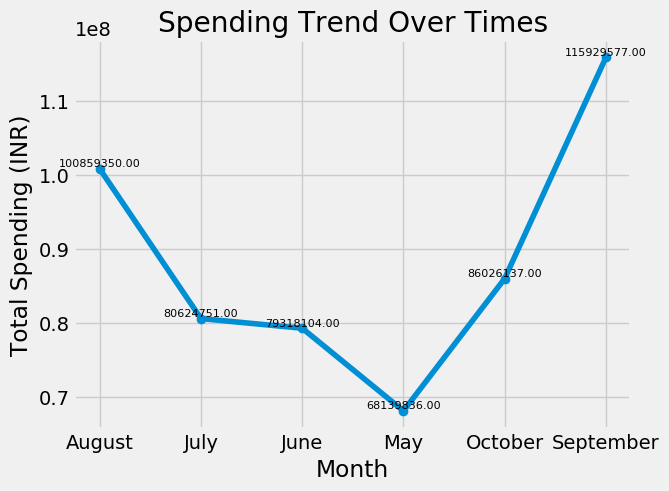

In [148]:
stom = df.groupby('month')['spend'].sum()
ax = stom.plot(kind= 'line', marker= 'o', title= 'Spending Trend Over Times')
for i, v in enumerate(stom):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)
plt.xlabel('Month')
plt.ylabel('Total Spending (INR)')
plt.show()

Monthly Spending by Gender: Is there a significant difference in spending between genders each month?

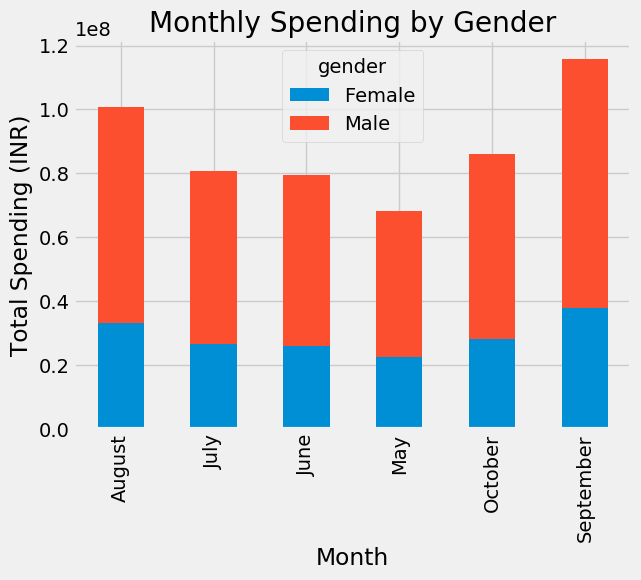

In [137]:
msg = df.groupby(['month', 'gender'])['spend'].sum().unstack()

msg.plot(kind='bar', stacked=True, title='Monthly Spending by Gender')
plt.xlabel('Month')
plt.ylabel('Total Spending(INR)')
plt.show()

City-wise Spending Analysis: How does spending vary across different cities?

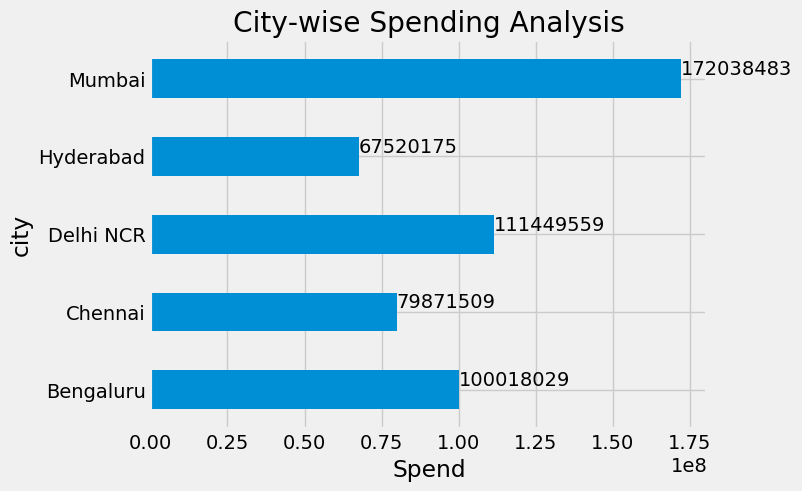

In [145]:
csa = df.groupby('city')['spend'].sum()
csa.plot(kind = 'barh', title = 'City-wise Spending Analysis')
for i, v in enumerate(csa):
    plt.text(v, i, str(v), ha= 'left', va='bottom')
plt.xlabel('Spend')
plt.ylabel('City')
plt.show()

Category-wise Spending Trend: Visualize the trend of spending in each category over the months.

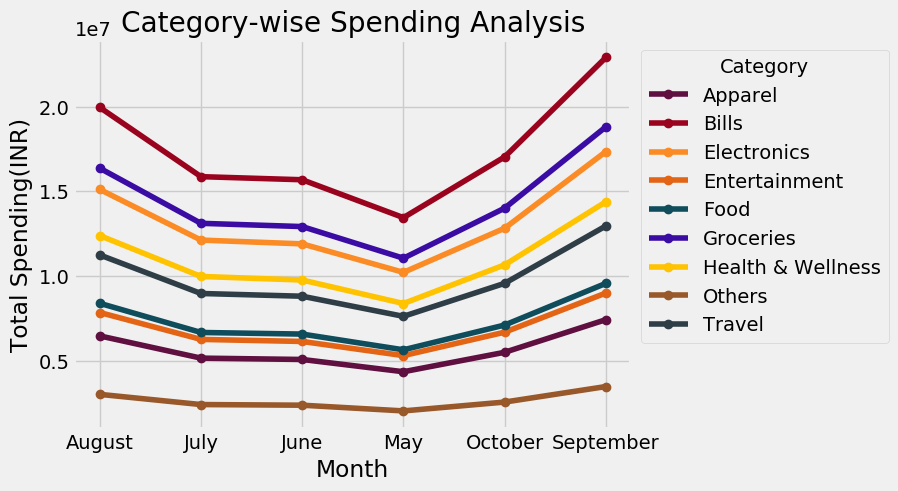

In [149]:
cwst = df.groupby(['month', 'category'])['spend'].sum().unstack()
colors= ['#5f0f40', '#9a031e', '#fb8b24', '#e36414', '#0f4c5c', '#3a0ca3', '#ffc300', '#99582a', '#2f3e46']
cwst.plot(kind= 'line', marker= 'o', title= 'Category-wise Spending Analysis', color= colors)
plt.xlabel('Month')
plt.ylabel('Total Spending(INR)')
plt.legend(title= 'Category', bbox_to_anchor=(1,1))
plt.show()

Payment Type Preference by Gender: Analyze the preference for payment types among different genders.

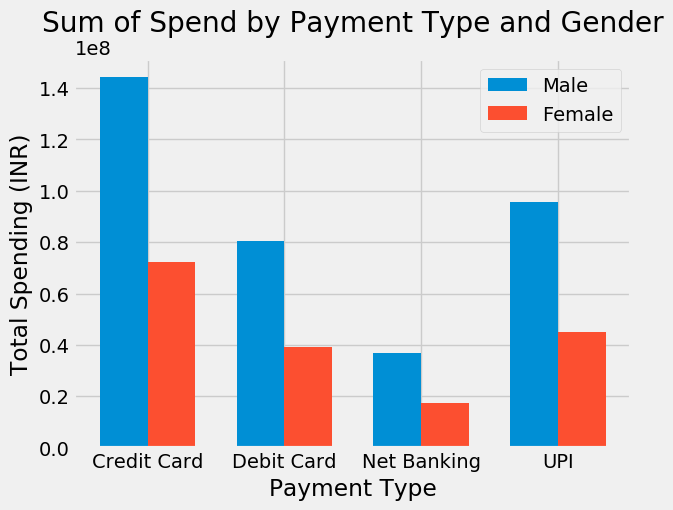

In [160]:
sbpg = df.groupby(['payment_type', 'gender'])['spend'].sum().reset_index()
fig, ax = plt.subplots()
width = 0.35 

payment_types = sbpg['payment_type'].unique()
bar_positions_male = range(len(payment_types))
bar_positions_female = [pos + width for pos in bar_positions_male]

ax.bar(bar_positions_male, sbpg[sbpg['gender'] == 'Male']['spend'], width, label='Male')
ax.bar(bar_positions_female, sbpg[sbpg['gender'] == 'Female']['spend'], width, label='Female')

ax.set_xticks([pos + width / 2 for pos in bar_positions_male])
ax.set_xticklabels(payment_types)
ax.set_xlabel('Payment Type')
ax.set_ylabel('Total Spending (INR)')
ax.set_title('Sum of Spend by Payment Type and Gender')
ax.legend()
plt.show()

Average Spending by Occupation and Age-group: Determine the average spending based on the occupation and age-group of the customers.

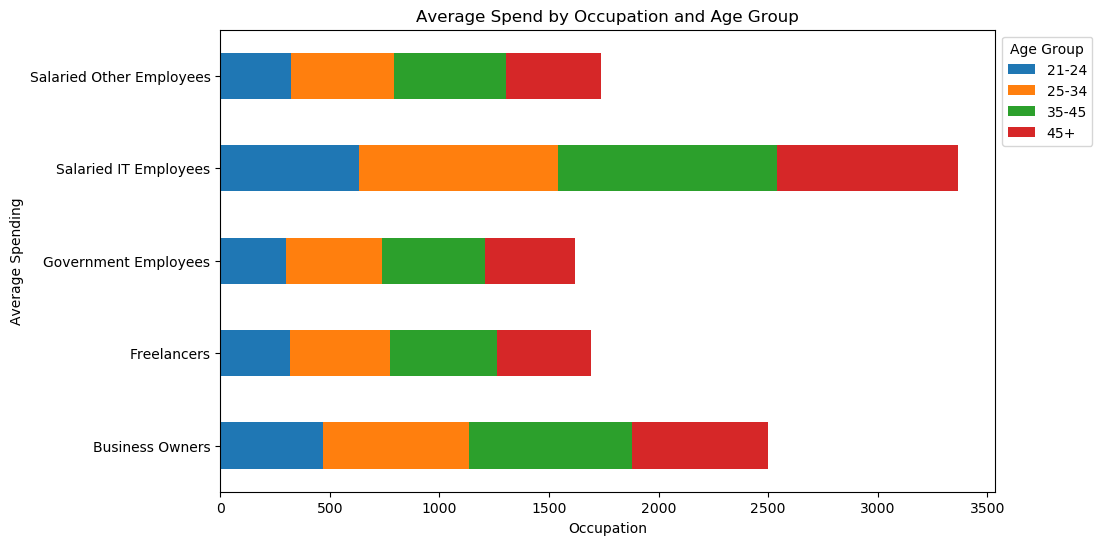

In [27]:
plt.style.use("_classic_test_patch")
average_spend_by_occupation_age = df.groupby(['occupation', 'age_group'])['spend'].mean().reset_index()

pivot_table = average_spend_by_occupation_age.pivot(index='occupation', columns='age_group', values='spend')

pivot_table.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Average Spend by Occupation and Age Group')
plt.xlabel('Occupation')
plt.ylabel('Average Spending')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.show()


Age Group-wise Spending Pattern: Explore the spending patterns among different age groups.

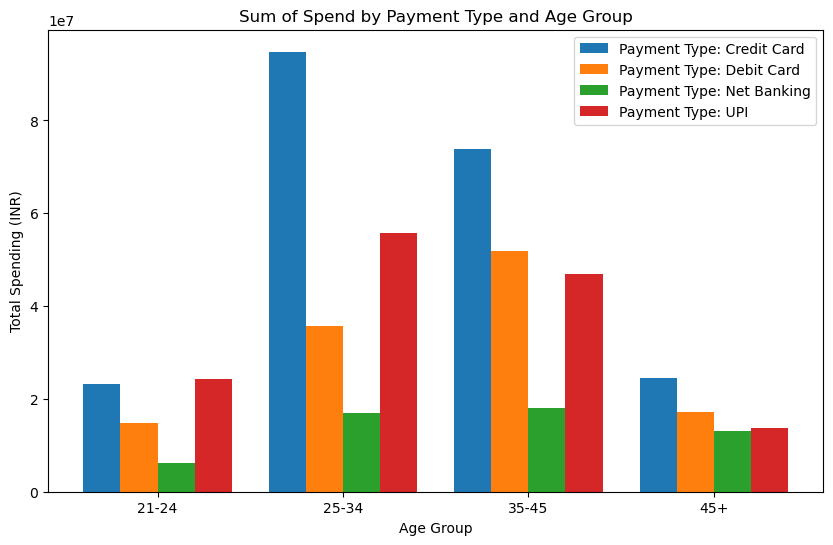

In [12]:
spending_by_payment_age = df.groupby(['payment_type', 'age_group'])['spend'].sum().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2 

payment_types = spending_by_payment_age['payment_type'].unique()
bar_positions = [i for i in range(len(payment_types))]

for i, payment_type in enumerate(payment_types):
    age_group_data = spending_by_payment_age[spending_by_payment_age['payment_type'] == payment_type]
    ax.bar([pos + width * i for pos in bar_positions],
           age_group_data['spend'],
           width,
           label=f'Payment Type: {payment_type}')

ax.set_xticks([pos + width * (len(payment_types) - 1) / 2 for pos in bar_positions])
ax.set_xticklabels(spending_by_payment_age['age_group'].unique())
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Spending (INR)')
ax.set_title('Sum of Spend by Payment Type and Age Group')
ax.legend()

plt.show()

Correlation Between Average Income and Spending: Is there any correlation between a customer's average income and their spending?


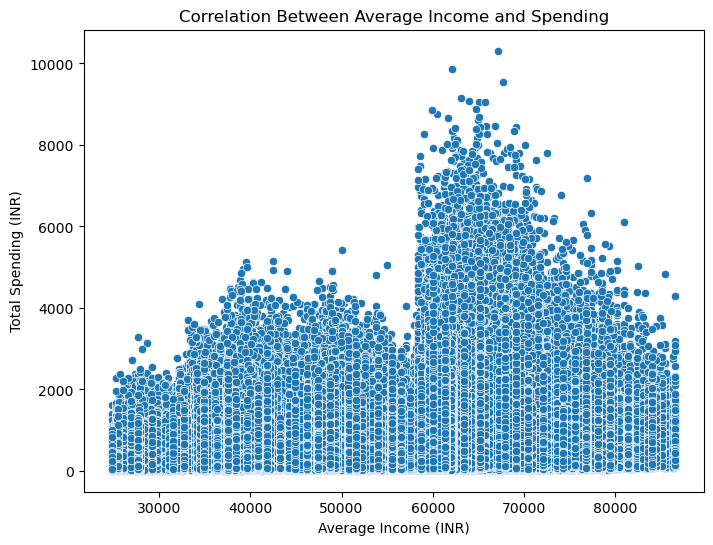

Correlation Coefficient: 0.24815893544642842


In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_income', y='spend', data=df)
plt.title('Correlation Between Average Income and Spending')
plt.xlabel('Average Income (INR)')
plt.ylabel('Total Spending (INR)')
plt.show()

correlation_coefficient = df['avg_income'].corr(df['spend'])
print(f"Correlation Coefficient: {correlation_coefficient}")


*Correlation Coefficient: 0.24815893544642842
The positive sign indicates a positive correlation, meaning that as one variable (average income) increases, the other variable (spending) tends to increase as well.
The value of 0.25 suggests a relatively weak positive correlation. While there is a positive tendency, the relationship is not very strong.